<a href="https://colab.research.google.com/github/KevinCandra9999/colab-test/blob/main/notebooks/Image_processing_and_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='../../data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

100%|██████████| 170498071/170498071 [00:05<00:00, 32364070.49it/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data


In [3]:
def display():
    for i in range(2):
        for j in range(2):
            plt.subplot(2, 2, i * 2 + j + 1)
            img, label = train_dataset[i * 2 + j]
            plt.imshow(img.numpy().transpose((1, 2, 0)))
            plt.title(label)
            plt.axis('off')

    plt.show()

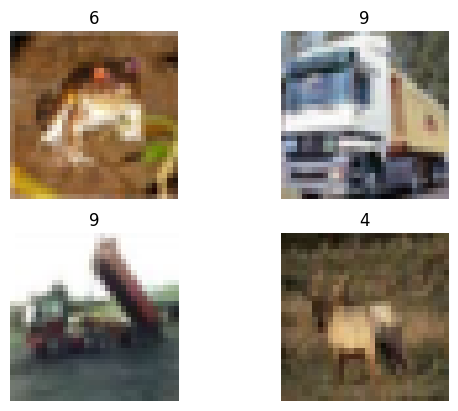

In [4]:
display()

In [5]:
print(train_dataset.data.shape)

(50000, 32, 32, 3)


In [6]:
print(np.mean(train_dataset.data, axis=(0, 1, 2)) / 255)
print(np.std(train_dataset.data, axis=(0, 1, 2)) / 255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


In [7]:
train_dataset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [8]:
train_dataset.data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.49139968, 0.48215841, 0.44653091),
                                     std=(0.24703223, 0.24348513, 0.26158784,))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='../../data',
    train=True,
    transform=train_transforms,
    download=True
)

Files already downloaded and verified


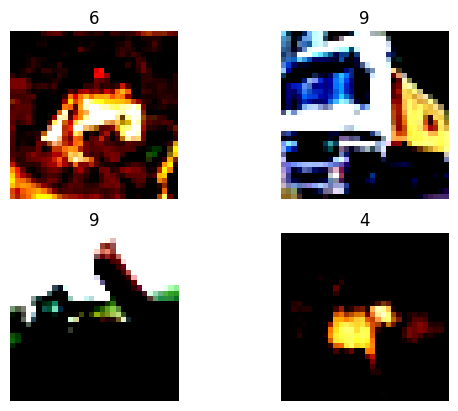

In [10]:
display()

Files already downloaded and verified


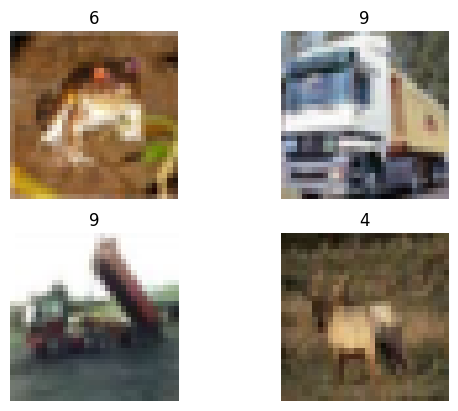

Files already downloaded and verified


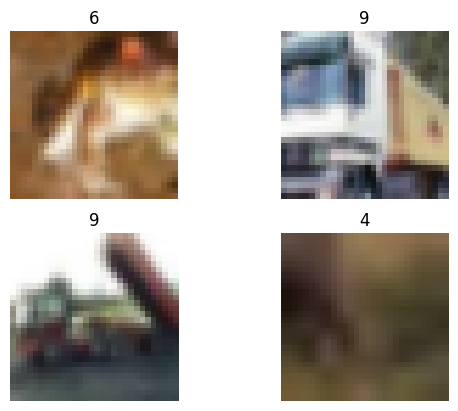

Files already downloaded and verified


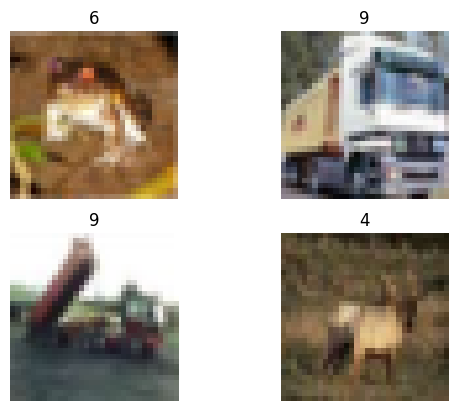

Files already downloaded and verified


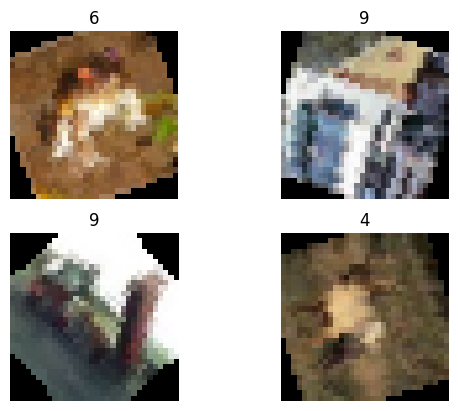

In [11]:
transforms_to_apply = [
    torchvision.transforms.RandomResizedCrop(30),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(90)
]

train_dataset = torchvision.datasets.CIFAR10(
    root='../../data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

display()

for temp_transform in transforms_to_apply:
    combined_transforms = torchvision.transforms.Compose([
        temp_transform,
        torchvision.transforms.ToTensor()
    ])

    train_dataset = torchvision.datasets.CIFAR10(
        root='../../data',
        train=True,
        transform=combined_transforms,
        download=True
    )

    display()

Files already downloaded and verified


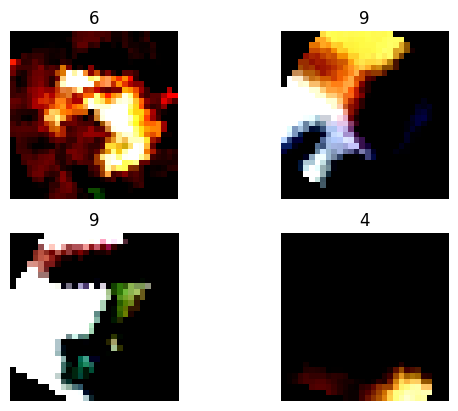

In [12]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(30),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(90),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.49139968, 0.48215841, 0.44653091),
                                     std=(0.24703223, 0.24348513, 0.26158784,))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='../../data',
    train=True,
    transform=train_transforms,
    download=True
)

display()